In [1]:
!pip install -e .

Obtaining file:///C:/Users/SHARON/Downloads/Enhancing%20Investment%20Decion-Making%20in%20Volatile%20Financial%20Markets
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to c:\users\sharon\appdata\local\temp\pip-install-n_31t93b\elegantrl_7eda564aac7447feb27ceb4be1664726
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit b4b9d662b9f9cb7cc368ac2b1036b5119eb20be4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'don

  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git 'C:\Users\SHARON\AppData\Local\Temp\pip-install-n_31t93b\elegantrl_7eda564aac7447feb27ceb4be1664726'
ERROR: Package 'finrl' requires a different Python: 3.11.5 not in '<3.11,>=3.10'


In [2]:
!pip install pypfopt
!pip install pyfolio
!pip install yfinance
!pip install gymnasium
!pip install stockstats
!pip install stable_baselines3
!pip install alpaca_trade_api
!pip install exchange_calendars
!pip install wrds
!pip install tensorboard

ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Attempting uninstall: html5lib
    Found existing installation: html5lib 0.9999999
    Uninstalling html5lib-0.9999999:
      Successfully uninstalled html5lib-0.9999999


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bleach 1.5.0 requires html5lib!=0.9999,!=0.99999,<0.99999999,>=0.999, but you have html5lib 1.1 which is incompatible.


In [4]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf




from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers
from finrl.config import INDICATORS

from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.config import INDICATORS, TRAINED_MODEL_DIR, RESULTS_DIR
from finrl.main import check_and_make_directories
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

check_and_make_directories([TRAINED_MODEL_DIR])
import itertools

In [4]:
config_tickers.DOW_30_TICKER

['AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'JPM',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'CRM',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS',
 'DOW']

In [5]:
TRAIN_START_DATE= '2009-01-01'
TRAIN_END_DATE= '2021-07-01'
TRADE_START_DATE='2021-07-01'
TRADE_END_DATE= '2023-10-01'

In [6]:
df_raw= YahooDownloader(start_date =TRAIN_START_DATE,
                       end_date = TRADE_END_DATE,
                       ticker_list=config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (108761, 8)


In [94]:
df_raw.head(7)

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.747391,746015200,AAPL,4
1,2009-01-02,58.590000,59.080002,57.750000,42.737900,6547900,AMGN,4
2,2009-01-02,18.570000,19.520000,18.400000,15.144921,10955700,AXP,4
3,2009-01-02,42.799999,45.560001,42.779999,33.941097,7010200,BA,4
4,2009-01-02,44.910000,46.980000,44.709999,31.093391,7117200,CAT,4
5,2009-01-02,8.025000,8.550000,7.912500,8.505000,4069200,CRM,4
6,2009-01-02,16.410000,17.000000,16.250000,11.595378,40980600,CSCO,4


# INDICATORS

In [8]:
fe= FeatureEngineer(
use_technical_indicator=True,
    tech_indicator_list=INDICATORS,
    use_vix=True,
    use_turbulence=True,
    user_defined_feature=False
)

df_processed=fe.preprocess_data(df_raw)
df_processed.head()

Successfully added technical indicators


[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (3710, 8)
Successfully added vix
Successfully added turbulence index


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,3.067143,3.251429,3.041429,2.747391,746015200,AAPL,4,0.0,2.969345,2.641387,100.0,66.666667,100.0,2.747391,2.747391,39.189999,0.0
1,2009-01-02,58.590000,59.080002,57.750000,42.737900,6547900,AMGN,4,0.0,2.969345,2.641387,100.0,66.666667,100.0,42.737900,42.737900,39.189999,0.0
2,2009-01-02,18.570000,19.520000,18.400000,15.144921,10955700,AXP,4,0.0,2.969345,2.641387,100.0,66.666667,100.0,15.144921,15.144921,39.189999,0.0
3,2009-01-02,42.799999,45.560001,42.779999,33.941097,7010200,BA,4,0.0,2.969345,2.641387,100.0,66.666667,100.0,33.941097,33.941097,39.189999,0.0
4,2009-01-02,44.910000,46.980000,44.709999,31.093391,7117200,CAT,4,0.0,2.969345,2.641387,100.0,66.666667,100.0,31.093391,31.093391,39.189999,0.0


In [9]:
list_ticker= df_processed["tic"].unique().tolist()
list_date= list(pd.date_range(df_processed['date'].min(), df_processed['date'].max()).astype(str))
combination= list(itertools.product(list_date,list_ticker))

In [10]:
processed_full=pd.DataFrame(combination,columns=["date","tic"]).merge(df_processed, on=["date", "tic"], how="left")
processed_full=processed_full[processed_full['date'].isin(df_processed['date'])]
processed_full=processed_full.sort_values(['date','tic'])
processed_full=processed_full.fillna(0)
processed_full

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,AAPL,3.067143,3.251429,3.041429,2.747391,746015200.0,4.0,0.000000,2.969345,2.641387,100.000000,66.666667,100.000000,2.747391,2.747391,39.189999,0.000000
1,2009-01-02,AMGN,58.590000,59.080002,57.750000,42.737900,6547900.0,4.0,0.000000,2.969345,2.641387,100.000000,66.666667,100.000000,42.737900,42.737900,39.189999,0.000000
2,2009-01-02,AXP,18.570000,19.520000,18.400000,15.144921,10955700.0,4.0,0.000000,2.969345,2.641387,100.000000,66.666667,100.000000,15.144921,15.144921,39.189999,0.000000
3,2009-01-02,BA,42.799999,45.560001,42.779999,33.941097,7010200.0,4.0,0.000000,2.969345,2.641387,100.000000,66.666667,100.000000,33.941097,33.941097,39.189999,0.000000
4,2009-01-02,CAT,44.910000,46.980000,44.709999,31.093391,7117200.0,4.0,0.000000,2.969345,2.641387,100.000000,66.666667,100.000000,31.093391,31.093391,39.189999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156102,2023-09-28,UNH,505.970001,514.150024,505.010010,508.365753,2922000.0,3.0,4.785848,512.064328,461.806485,57.758006,166.405084,10.861846,487.588419,489.424772,17.340000,20.224576
156103,2023-09-28,V,230.669998,232.539993,229.669998,231.167862,4203900.0,3.0,-2.791937,253.938073,228.093708,43.224138,-162.868873,24.531590,241.016555,239.901618,17.340000,20.224576
156104,2023-09-28,VZ,32.400002,32.619999,32.400002,31.341228,18772100.0,3.0,-0.264603,33.690072,31.154017,41.942190,-143.297635,27.271361,32.374383,32.430181,17.340000,20.224576
156105,2023-09-28,WBA,21.160000,21.219999,20.740000,20.416763,7291500.0,3.0,-1.276713,23.509872,19.581222,27.520306,-87.217820,52.799678,22.817931,25.695382,17.340000,20.224576


In [97]:
processed_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107590 entries, 0 to 156106
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          107590 non-null  object 
 1   tic           107590 non-null  object 
 2   open          107590 non-null  float64
 3   high          107590 non-null  float64
 4   low           107590 non-null  float64
 5   close         107590 non-null  float64
 6   volume        107590 non-null  float64
 7   day           107590 non-null  float64
 8   macd          107590 non-null  float64
 9   boll_ub       107590 non-null  float64
 10  boll_lb       107590 non-null  float64
 11  rsi_30        107590 non-null  float64
 12  cci_30        107590 non-null  float64
 13  dx_30         107590 non-null  float64
 14  close_30_sma  107590 non-null  float64
 15  close_60_sma  107590 non-null  float64
 16  vix           107590 non-null  float64
 17  turbulence    107590 non-null  float64
dtypes: float6

In [11]:
df_train= data_split(processed_full, TRAIN_START_DATE, TRAIN_END_DATE)
df_test= data_split(processed_full, TRADE_START_DATE, TRADE_END_DATE)

print(len(df_train))
print(len(df_test))

91205
16385


In [12]:
stock_dimension= len(df_train.tic.unique())
state_space= 1+2 *stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [13]:
buy_cost_list= sell_cost_list=[0.001]*stock_dimension #transaction cost
num_stock_shares=[0]*stock_dimension #initial stock allocation we start with owning only cash

env_kwargs={
    "hmax":100,#number of shares you're allowed to buy or sell per asset at any given state
    "initial_amount":1_000_000,
    "num_stock_shares":num_stock_shares,
    "buy_cost_pct":buy_cost_list,
    "sell_cost_pct":sell_cost_list,
    "state_space": state_space,
    "stock_dim":stock_dimension,
    "tech_indicator_list":INDICATORS,
    "action_space":stock_dimension,
    "reward_scaling": 1e4
}

e_train_gym=StockTradingEnv(df=df_train, **env_kwargs)

In [14]:
StockTradingEnv?

# CREATE ENVIRONMENT

In [15]:
env_train, _=e_train_gym.get_sb_env()
type(env_train)

stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv

In [16]:
from stable_baselines3.common.logger import configure
agent = DRLAgent(env=env_train) #import the agent

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 =True
if_using_sac = True

# use A2C model 

In [17]:
agent=  DRLAgent(env=env_train)
model_a2c=agent.get_model("a2c", policy="MlpPolicy")

if if_using_a2c:
    #set up logger
    tmp_path = RESULTS_DIR +'/a2c' #to store the results
    new_logger_a2c= configure(tmp_path, ["stdout", "csv", "tensorboard"])
    #set new logger
    model_a2c.set_logger(new_logger_a2c)

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c


In [18]:
trained_a2c=agent.train_model(
model=model_a2c,
    tb_log_name='a2c',
    total_timesteps= 50_000
)if if_using_a2c else None

---------------------------------------
| time/                 |             |
|    fps                | 62          |
|    iterations         | 100         |
|    time_elapsed       | 8           |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -41.2       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 99          |
|    policy_loss        | -3.11e+08   |
|    reward             | -27750896.0 |
|    std                | 1           |
|    value_loss         | 1.63e+15    |
---------------------------------------
----------------------------------------
| time/                 |              |
|    fps                | 61           |
|    iterations         | 200          |
|    time_elapsed       | 16           |
|    total_timesteps    | 1000         |
| train/                |              |
|    entropy_loss       | -41.2        |
|    explained_variance | 0     

---------------------------------------
| time/                 |             |
|    fps                | 59          |
|    iterations         | 1400        |
|    time_elapsed       | 117         |
|    total_timesteps    | 7000        |
| train/                |             |
|    entropy_loss       | -41.3       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 1399        |
|    policy_loss        | -2.67e+09   |
|    reward             | 266094940.0 |
|    std                | 1.01        |
|    value_loss         | 1.25e+16    |
---------------------------------------
----------------------------------------
| time/                 |              |
|    fps                | 59           |
|    iterations         | 1500         |
|    time_elapsed       | 125          |
|    total_timesteps    | 7500         |
| train/                |              |
|    entropy_loss       | -41.3        |
|    explained_variance | 0     

--------------------------------------
| time/                 |            |
|    fps                | 64         |
|    iterations         | 2700       |
|    time_elapsed       | 210        |
|    total_timesteps    | 13500      |
| train/                |            |
|    entropy_loss       | -41.4      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 2699       |
|    policy_loss        | -8.71e+08  |
|    reward             | -9683101.0 |
|    std                | 1.01       |
|    value_loss         | 1.05e+15   |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 64         |
|    iterations         | 2800       |
|    time_elapsed       | 218        |
|    total_timesteps    | 14000      |
| train/                |            |
|    entropy_loss       | -41.4      |
|    explained_variance | 0          |
|    learning_rate      |

---------------------------------------
| time/                 |             |
|    fps                | 64          |
|    iterations         | 4000        |
|    time_elapsed       | 309         |
|    total_timesteps    | 20000       |
| train/                |             |
|    entropy_loss       | -41.2       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 3999        |
|    policy_loss        | -1.7e+10    |
|    reward             | 232505800.0 |
|    std                | 1           |
|    value_loss         | 3.43e+17    |
---------------------------------------
----------------------------------------
| time/                 |              |
|    fps                | 62           |
|    iterations         | 4100         |
|    time_elapsed       | 325          |
|    total_timesteps    | 20500        |
| train/                |              |
|    entropy_loss       | -41.2        |
|    explained_variance | -1.19e

--------------------------------------
| time/                 |            |
|    fps                | 64         |
|    iterations         | 5300       |
|    time_elapsed       | 411        |
|    total_timesteps    | 26500      |
| train/                |            |
|    entropy_loss       | -41.1      |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0007     |
|    n_updates          | 5299       |
|    policy_loss        | 7.39e+09   |
|    reward             | -7716460.5 |
|    std                | 0.999      |
|    value_loss         | 3.92e+16   |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 64          |
|    iterations         | 5400        |
|    time_elapsed       | 419         |
|    total_timesteps    | 27000       |
| train/                |             |
|    entropy_loss       | -41.1       |
|    explained_variance | 0           |
|    learning_ra

----------------------------------------
| time/                 |              |
|    fps                | 64           |
|    iterations         | 6600         |
|    time_elapsed       | 510          |
|    total_timesteps    | 33000        |
| train/                |              |
|    entropy_loss       | -40.9        |
|    explained_variance | -1.19e-07    |
|    learning_rate      | 0.0007       |
|    n_updates          | 6599         |
|    policy_loss        | 6.54e+09     |
|    reward             | -115587260.0 |
|    std                | 0.993        |
|    value_loss         | 3.14e+16     |
----------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 64          |
|    iterations         | 6700        |
|    time_elapsed       | 518         |
|    total_timesteps    | 33500       |
| train/                |             |
|    entropy_loss       | -40.9       |
|    explained_variance 

----------------------------------------
| time/                 |              |
|    fps                | 64           |
|    iterations         | 7900         |
|    time_elapsed       | 613          |
|    total_timesteps    | 39500        |
| train/                |              |
|    entropy_loss       | -40.6        |
|    explained_variance | 1.79e-07     |
|    learning_rate      | 0.0007       |
|    n_updates          | 7899         |
|    policy_loss        | -1.99e+09    |
|    reward             | -115966640.0 |
|    std                | 0.984        |
|    value_loss         | 1.06e+17     |
----------------------------------------
----------------------------------------
| time/                 |              |
|    fps                | 64           |
|    iterations         | 8000         |
|    time_elapsed       | 622          |
|    total_timesteps    | 40000        |
| train/                |              |
|    entropy_loss       | -40.6        |
|    explained_v

----------------------------------------
| time/                 |              |
|    fps                | 64           |
|    iterations         | 9200         |
|    time_elapsed       | 717          |
|    total_timesteps    | 46000        |
| train/                |              |
|    entropy_loss       | -40.6        |
|    explained_variance | -1.19e-07    |
|    learning_rate      | 0.0007       |
|    n_updates          | 9199         |
|    policy_loss        | -9.63e+09    |
|    reward             | -231877310.0 |
|    std                | 0.985        |
|    value_loss         | 6.01e+16     |
----------------------------------------
-----------------------------------------
| time/                 |               |
|    fps                | 64            |
|    iterations         | 9300          |
|    time_elapsed       | 726           |
|    total_timesteps    | 46500         |
| train/                |               |
|    entropy_loss       | -40.6         |
|    exp

In [19]:
trained_a2c.save(TRAINED_MODEL_DIR + "/agent_a2c") if if_using_a2c else None

In [20]:
df_a2c=pd.read_csv("results/a2c/progress.csv")
df_a2c.head()

,train/value_loss,train/explained_variance,train/entropy_loss,train/learning_rate,train/n_updates,time/time_elapsed,train/std,train/policy_loss,time/fps,time/total_timesteps,time/iterations,train/reward
0,1.628616e+15,0.0,-41.205833,0.0007,99,8,1.002029,-3.107658e+08,62,500,100,-2.775090e+07
1,6.098839e+16,0.0,-41.194012,0.0007,199,16,1.002019,7.821559e+09,61,1000,200,-2.360493e+08
2,1.304439e+18,0.0,-41.263550,0.0007,299,25,1.003794,-4.720905e+10,57,1500,300,6.247633e+08
3,1.193601e+17,0.0,-41.263260,0.0007,399,35,1.004192,-1.844772e+09,55,2000,400,1.137908e+08
4,3.581005e+18,0.0,-41.303970,0.0007,499,45,1.005661,6.921345e+10,55,2500,500,-1.722522e+09


<Axes: xlabel='train/n_updates'>

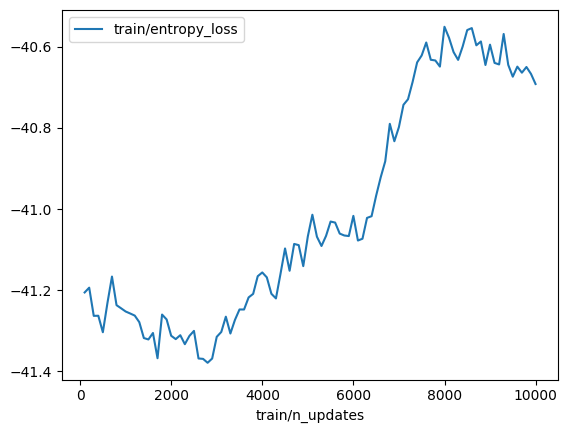

In [21]:
%matplotlib inline
df_a2c.plot(x="train/n_updates", y = "train/entropy_loss")

# Use DDPG Model

In [22]:
agent=  DRLAgent(env=env_train)
model_ddpg=agent.get_model("ddpg")

if if_using_ddpg:
    #set up logger
    tmp_path = RESULTS_DIR +'/ddpg' #to store the results
    new_logger_ddpg= configure(tmp_path, ["stdout", "csv", "tensorboard"])
    #set new logger
    model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg


In [23]:
trained_ddpg=agent.train_model(model=model_ddpg,
                              tb_log_name='ddpg',
                              total_timesteps=50_000) if if_using_ddpg else None

day: 3144, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 7310961.78
total_reward: 6310961.78
total_cost: 999.00
total_trades: 69168
Sharpe: 0.950
------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 18          |
|    time_elapsed    | 696         |
|    total_timesteps | 12580       |
| train/             |             |
|    actor_loss      | -5.13e+08   |
|    critic_loss     | 1.65e+17    |
|    learning_rate   | 0.001       |
|    n_updates       | 9435        |
|    reward          | 421543000.0 |
------------------------------------
------------------------------------
| time/              |             |
|    episodes        | 8           |
|    fps             | 15          |
|    time_elapsed    | 1653        |
|    total_timesteps | 25160       |
| train/             |             |
|    actor_loss      | -1.19e+09   |
|    critic_loss     | 1.56e+17    |
|    learning_rate   | 0.00

KeyboardInterrupt: 

In [25]:
df_ddpg = pd.read_csv("results/ddpg/progress.csv")
df_ddpg.head()

,train/learning_rate,train/n_updates,time/time_elapsed,train/critic_loss,train/actor_loss,time/fps,time/total_timesteps,time/episodes,train/reward
0,0.001,9435,696,1.652007e+17,-5.126383e+08,18,12580,4,421543000.0
1,0.001,22015,1653,1.560049e+17,-1.192828e+09,15,25160,8,421543000.0
2,0.001,34595,2510,1.525842e+17,-1.560913e+09,15,37740,12,421543000.0


<Axes: xlabel='train/n_updates'>

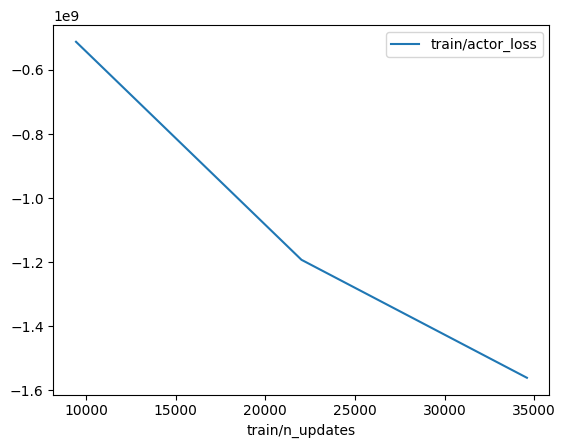

In [26]:
df_ddpg.plot(x="train/n_updates", y="train/actor_loss")

# PPO Agent

In [27]:
agent=DRLAgent(env=env_train)
PPO_PARAMS={
    "n_steps":2048,
    "ent_coef":0.01,
    "learning_rate":0.00025,
    "batch_size":128,
}

model_ppo=agent.get_model("ppo",model_kwargs=PPO_PARAMS)

if if_using_ppo:
    #set up logger
    tmp_path = RESULTS_DIR +'/ppo' #to store the results
    new_logger_ppo= configure(tmp_path, ["stdout", "csv", "tensorboard"])
    #set new logger
    model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo


In [28]:
trained_ppo=agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=50_000)if if_using_ppo else None

-----------------------------------
| time/              |            |
|    fps             | 76         |
|    iterations      | 1          |
|    time_elapsed    | 26         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | 22188826.0 |
-----------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 77           |
|    iterations           | 2            |
|    time_elapsed         | 53           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0          |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -41.1        |
|    explained_variance   | 0            |
|    learning_rate        | 0.00025      |
|    loss                 | 3.9e+16      |
|    n_updates            | 10           |
|    policy_gradient_loss | -1.

------------------------------------------
| time/                   |              |
|    fps                  | 81           |
|    iterations           | 12           |
|    time_elapsed         | 301          |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 5.820766e-11 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -41.1        |
|    explained_variance   | 0            |
|    learning_rate        | 0.00025      |
|    loss                 | 2.75e+17     |
|    n_updates            | 110          |
|    policy_gradient_loss | -3.34e-07    |
|    reward               | -699548.4    |
|    std                  | 1            |
|    value_loss           | 7.56e+17     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 81           |
|    iterat

------------------------------------------
| time/                   |              |
|    fps                  | 84           |
|    iterations           | 22           |
|    time_elapsed         | 532          |
|    total_timesteps      | 45056        |
| train/                  |              |
|    approx_kl            | 2.561137e-09 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -41.1        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.00025      |
|    loss                 | 8.69e+16     |
|    n_updates            | 210          |
|    policy_gradient_loss | -8.03e-07    |
|    reward               | -24731398.0  |
|    std                  | 1            |
|    value_loss           | 1.66e+17     |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 84            |
|    ite

In [29]:
trained_ppo.save(TRAINED_MODEL_DIR + "/agent_ppo")if if_using_ppo else None

In [30]:
df_ppo=pd.read_csv("results/ppo/progress.csv")
df_ppo.head()

,time/fps,time/total_timesteps,time/time_elapsed,time/iterations,train/reward,train/value_loss,train/approx_kl,train/entropy_loss,train/learning_rate,train/clip_fraction,train/policy_gradient_loss,train/explained_variance,train/n_updates,train/std,train/clip_range,train/loss
0,76,2048,26,1,22188826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77,4096,53,2,-131780290.0,1.303939e+17,0.0,-41.149220,0.00025,0.0,-1.605455e-07,0.000000e+00,10.0,1.0,0.2,3.900862e+16
2,79,6144,76,3,375684670.0,1.006566e+18,0.0,-41.149220,0.00025,0.0,-1.191918e-07,0.000000e+00,20.0,1.0,0.2,7.320503e+17
3,79,8192,103,4,-55447012.0,9.690047e+17,0.0,-41.149218,0.00025,0.0,-1.045340e-07,0.000000e+00,30.0,1.0,0.2,2.750610e+17
4,81,10240,126,5,-24104306.0,1.788894e+17,0.0,-41.149220,0.00025,0.0,-2.762405e-07,1.192093e-07,40.0,1.0,0.2,9.379606e+16


<Axes: xlabel='train/n_updates'>

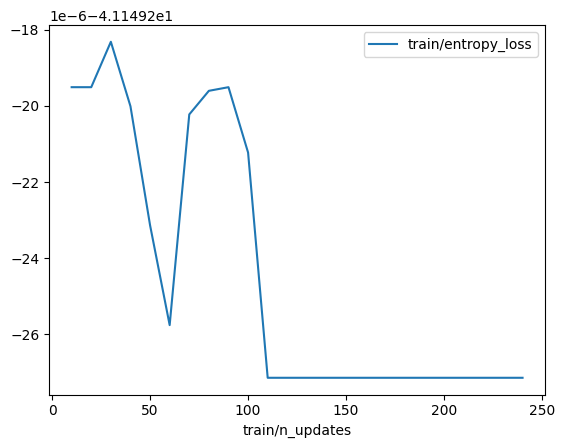

In [31]:
df_ppo.plot(x="train/n_updates",y="train/entropy_loss")

# TD3

In [32]:
agent=DRLAgent(env=env_train)
TD3_PARAMS={"batch_size":100,
           "buffer_size":1000000,
           "learning_rate":0.001}

model_td3=agent.get_model("td3",model_kwargs=TD3_PARAMS)

if if_using_td3:
    #set up logger
    tmp_path = RESULTS_DIR +'/td3' #to store the results
    new_logger_td3= configure(tmp_path, ["stdout", "csv", "tensorboard"])
    #set new logger
    model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


C:\Users\SHARON\anaconda3\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.45GB > 1.45GB
  warnings.warn(


Logging to results/td3


In [33]:
trained_td3=agent.train_model(model=model_td3,
                             tb_log_name='td3',
                             total_timesteps=50_000)if if_using_td3 else None

------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 15          |
|    time_elapsed    | 786         |
|    total_timesteps | 12580       |
| train/             |             |
|    actor_loss      | -3.13e+08   |
|    critic_loss     | 4.02e+17    |
|    learning_rate   | 0.001       |
|    n_updates       | 9435        |
|    reward          | 292667940.0 |
------------------------------------
------------------------------------
| time/              |             |
|    episodes        | 8           |
|    fps             | 20          |
|    time_elapsed    | 1257        |
|    total_timesteps | 25160       |
| train/             |             |
|    actor_loss      | -7.67e+08   |
|    critic_loss     | 3.9e+17     |
|    learning_rate   | 0.001       |
|    n_updates       | 22015       |
|    reward          | 292667940.0 |
------------------------------------
day: 3144, episode: 60
begin_total_ass

In [34]:
trained_td3.save(TRAINED_MODEL_DIR + "/agent_td3") if if_using_td3 else None

In [35]:
df_td3=pd.read_csv("results/td3/progress.csv")
df_td3.head()

,train/learning_rate,train/n_updates,time/time_elapsed,train/critic_loss,train/actor_loss,time/fps,time/total_timesteps,time/episodes,train/reward
0,0.001,9435,786,4.016053e+17,-3.125023e+08,15,12580,4,292667940.0
1,0.001,22015,1257,3.900941e+17,-7.667682e+08,20,25160,8,292667940.0
2,0.001,34595,1871,3.786216e+17,-1.104041e+09,20,37740,12,292667940.0
3,0.001,47175,2353,3.591748e+17,-1.356395e+09,21,50320,16,292667940.0


<Axes: xlabel='train/n_updates'>

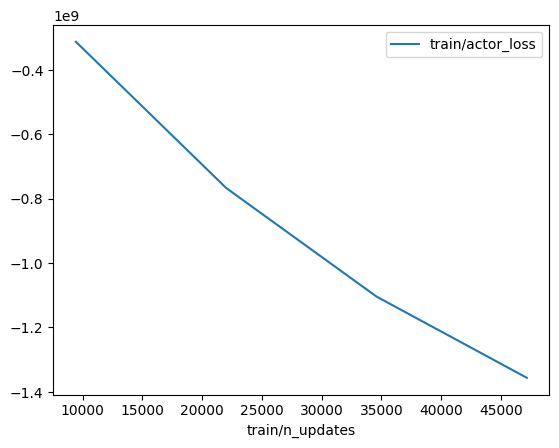

In [37]:
%matplotlib inline
df_td3.plot(x="train/n_updates", y = "train/actor_loss")

# In-sample Performance
Assume that the initial capital is $1,000,000

# Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data. If current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [38]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [39]:
insample_risk_indicator.vix.describe()

count    3145.000000
mean       19.173116
std         8.330195
min         9.140000
25%        13.500000
50%        16.660000
75%        22.219999
max        82.690002
Name: vix, dtype: float64

In [40]:
insample_risk_indicator.vix.quantile(0.996)

57.06848156738281

In [41]:
insample_risk_indicator.turbulence.describe()

count    3145.000000
mean       34.043520
std        43.181641
min         0.000000
25%        14.750186
50%        23.747553
75%        38.181702
max       652.504807
Name: turbulence, dtype: float64

In [42]:
insample_risk_indicator.turbulence.quantile(0.996)

282.47648857245366

# Trading (Out-of-sample Performance)
We update periodically in order to take full advantage of the data, e.g., retrain quarterly, monthly or weekly. We also tune the parameters along the way, in this notebook we use the in-sample data from 2009-01 to 2020-07 to tune the parameters once, so there is some alpha decay here as the length of trade date extends.

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [44]:
e_trade_gym = StockTradingEnv(df = df_test, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [45]:
df_test.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2021-07-01,AAPL,136.600006,137.330002,135.759995,135.318787,52485800.0,3.0,2.398910,136.759326,121.859538,60.297317,148.789919,18.250613,127.489672,128.026930,15.48,38.292581
0,2021-07-01,AMGN,243.740005,247.100006,243.550003,227.638916,2091600.0,3.0,0.270459,226.918495,217.137825,53.886416,96.245353,12.164483,222.053515,225.906780,15.48,38.292581
0,2021-07-01,AXP,165.649994,167.369995,164.690002,161.476227,2685900.0,3.0,1.881661,163.677192,154.502015,59.333626,82.134403,12.459134,157.510051,151.958127,15.48,38.292581
0,2021-07-01,BA,240.360001,241.800003,238.610001,239.729996,9516200.0,3.0,-0.427026,254.901314,234.711686,49.632692,-57.555797,1.090482,244.551334,240.845833,15.48,38.292581
0,2021-07-01,CAT,219.160004,219.789993,216.149994,205.244507,2426300.0,3.0,-4.628371,228.984514,189.673179,44.105011,-58.461981,12.636603,215.275170,218.273415,15.48,38.292581


In [46]:
from stable_baselines3 import A2C, DDPG, PPO, TD3

#Load saved models
trained_a2c =A2C.load(TRAINED_MODEL_DIR + "/agent_a2c")
trained_ddpg =DDPG.load(TRAINED_MODEL_DIR + "/agent_ddpg")
trained_ppo =PPO.load(TRAINED_MODEL_DIR + "/agent_ppo")
trained_td3 =TD3.load(TRAINED_MODEL_DIR + "/agent_td3")

C:\Users\SHARON\anaconda3\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.45GB > 1.96GB
  warnings.warn(


# set up environment

In [47]:
e_test_gym=StockTradingEnv(
    df=df_test, #environment now contains our out of sample testing data
    turbulence_threshold=70,
    risk_indicator_col='vix',
    **env_kwargs
)

# Make predictions using trained agents

In [48]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment=e_test_gym
)
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg,
    environment=e_test_gym
)
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo,
    environment=e_test_gym
)
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3,
    environment=e_test_gym
)

hit end!
hit end!
hit end!
hit end!


In [49]:
df_actions_a2c

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,0,35,43,0,0,100,21,0,37,0,...,1,100,0,0,100,0,29,0,0,41
2021-07-02,0,35,43,0,0,100,21,0,37,0,...,1,100,0,0,100,0,29,0,0,41
2021-07-06,0,35,43,0,0,100,21,0,37,0,...,1,100,0,0,100,0,29,0,0,41
2021-07-07,0,35,43,0,0,100,21,0,37,0,...,1,100,0,0,100,0,29,0,0,41
2021-07-08,0,35,43,0,0,100,21,0,37,0,...,1,100,0,0,100,0,29,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-09-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-09-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_a2c_action_pp=pd.concat([df_actions_a2c['BA'],df_actions_a2c['CSCO'],df_actions_a2c['DIS'],df_actions_a2c['GS'],df_actions_a2c['WMT'],
           ], axis=1)
#df_agent_result.index= pd.to_datetime(df_agent_results.index)
df_a2c_action_pp

,BA,CSCO,DIS,GS,WMT
date,,,,,
2021-07-01,0,21,37,0,41
2021-07-02,0,21,37,0,41
2021-07-06,0,21,37,0,41
2021-07-07,0,21,37,0,41
2021-07-08,0,21,37,0,41
...,...,...,...,...,...
2023-09-21,0,0,0,0,0
2023-09-22,0,0,0,0,0
2023-09-25,0,0,0,0,0


In [52]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

<Figure size 1500x500 with 0 Axes>

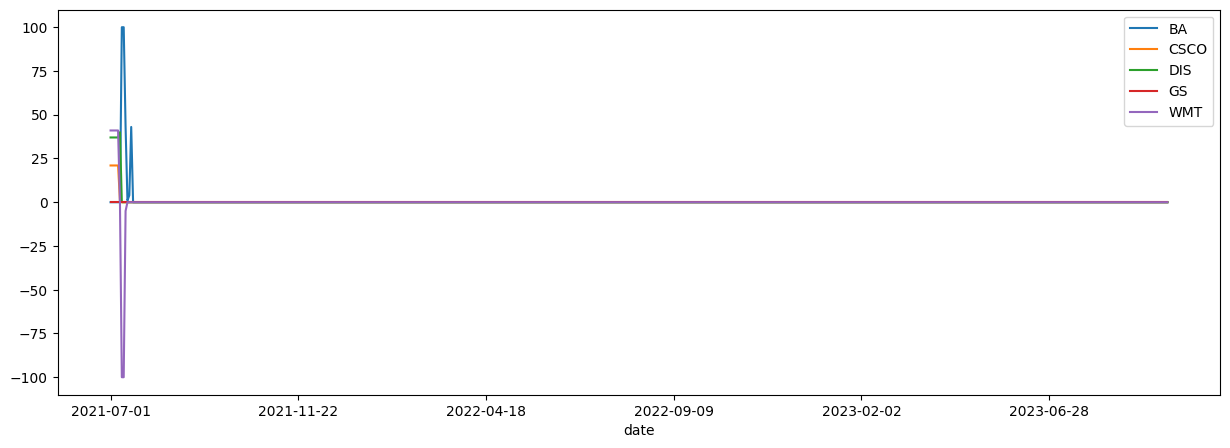

In [53]:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
df_a2c_action_pp.plot()

In [54]:
df_actions_ddpg

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,100,100,0,100,100,0,0,0,100,100,...,0,100,100,0,0,100,100,0,0,100
2021-07-02,100,100,0,100,100,0,0,0,100,100,...,0,100,100,0,0,100,100,0,0,100
2021-07-06,100,100,0,100,100,0,0,0,100,100,...,0,100,100,0,0,100,100,0,0,100
2021-07-07,9,100,0,100,100,0,0,0,100,100,...,0,100,0,0,0,0,0,0,0,100
2021-07-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-09-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-09-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_account_value_a2c=df_account_value_a2c.set_index("date")
df_account_value_a2c.columns=["A2c"]

df_account_value_ddpg=df_account_value_ddpg.set_index("date")
df_account_value_ddpg.columns=["DDPG"]

df_account_value_ppo=df_account_value_ppo.set_index("date")
df_account_value_ppo.columns=["PPO"]

df_account_value_td3=df_account_value_td3.set_index("date")
df_account_value_td3.columns=["TD3"]

In [56]:
df_agent_results=pd.concat([df_account_value_a2c,df_account_value_ddpg, df_account_value_ppo, df_account_value_td3], axis=1)
df_agent_results.index= pd.to_datetime(df_agent_results.index)
df_agent_results

,A2c,DDPG,PPO,TD3
date,,,,
2021-07-01,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2021-07-02,1.000933e+06,1.001538e+06,1.000000e+06,1.001547e+06
2021-07-06,9.994662e+05,9.982233e+05,9.999950e+05,9.982458e+05
2021-07-07,1.002125e+06,9.984960e+05,1.000001e+06,1.001689e+06
2021-07-08,9.950292e+05,9.931221e+05,9.999954e+05,9.987748e+05
...,...,...,...,...
2023-09-22,1.044394e+06,1.026071e+06,9.963792e+05,1.021924e+06
2023-09-25,1.043773e+06,1.029312e+06,9.975391e+05,1.021189e+06
2023-09-26,1.033525e+06,1.016740e+06,9.953208e+05,1.010533e+06


# Comparison

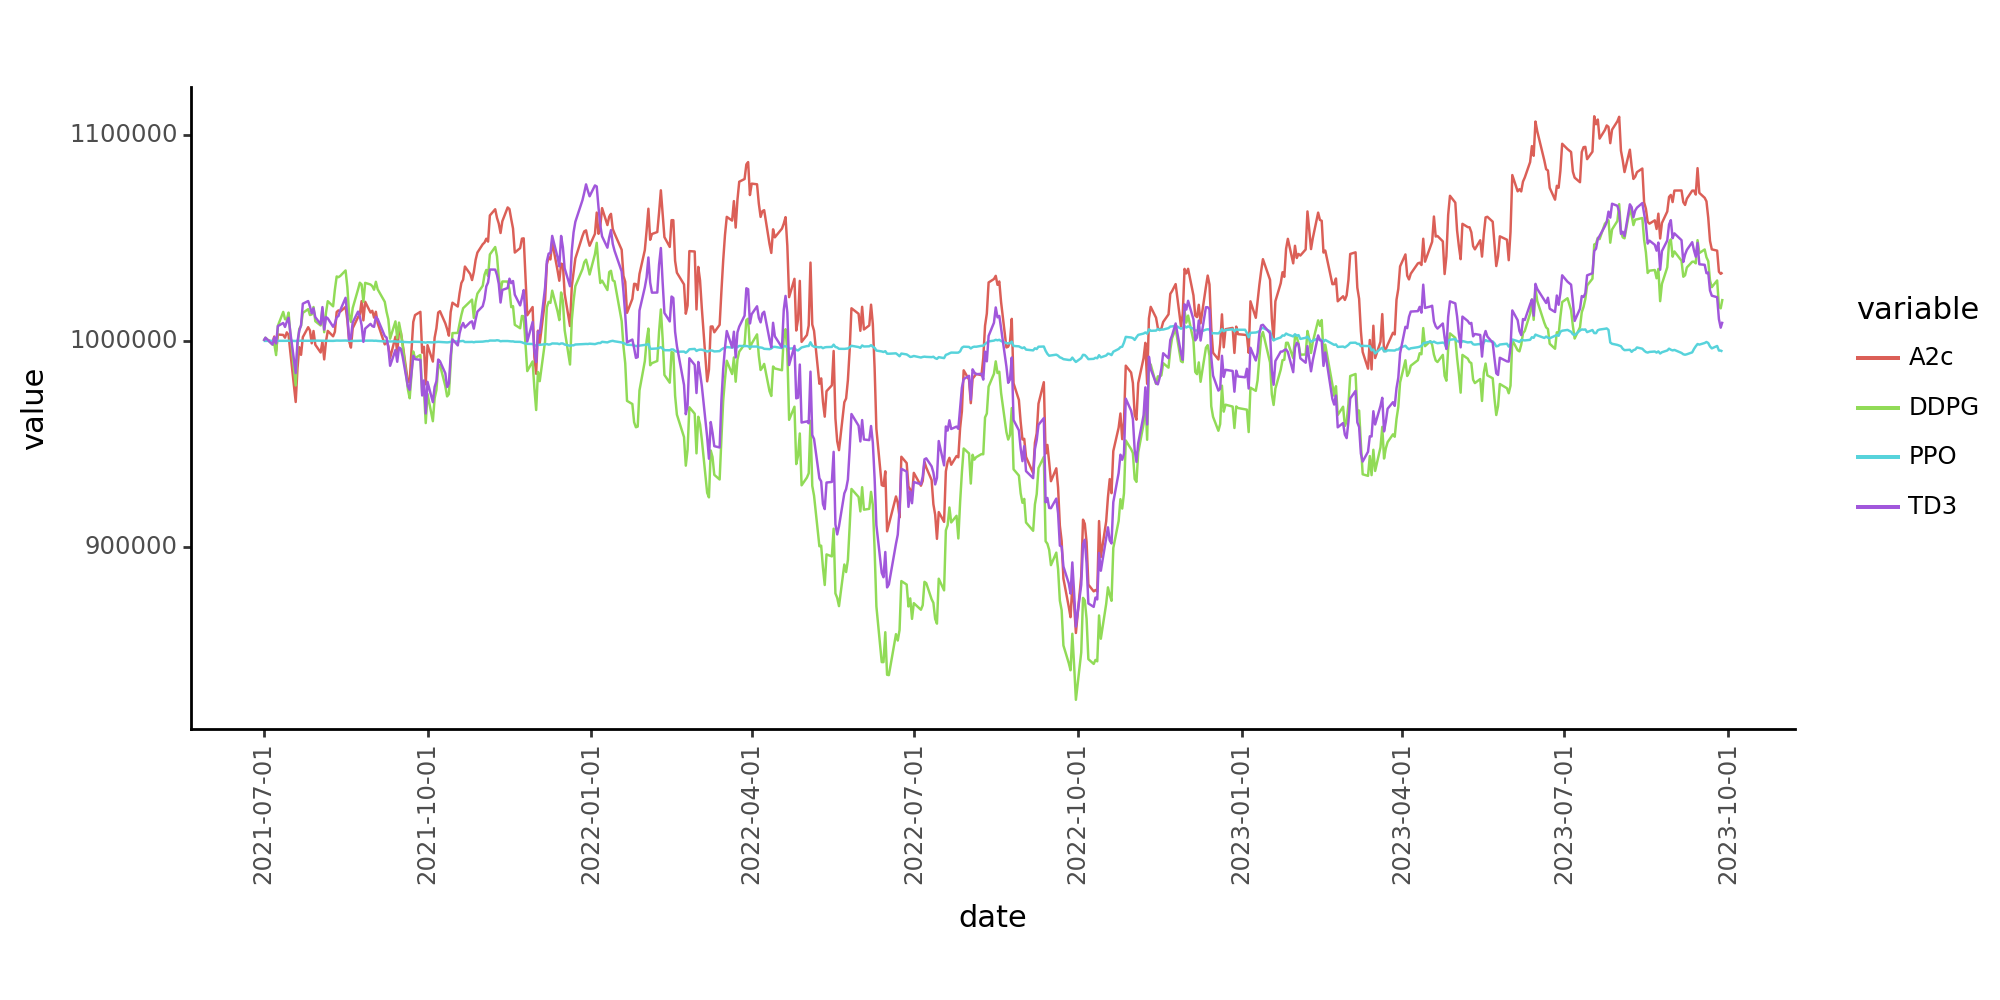

<Figure Size: (1000 x 500)>

In [57]:
from plotnine import *
df_agent_results_plot=df_agent_results.reset_index().melt(id_vars="date")

p=ggplot(df_agent_results_plot, aes(x="date", y="value", color="variable"))
p+geom_line() + theme_classic() + theme(axis_text_x=element_text(rotation=90), aspect_ratio=0.4, figure_size=(10,5))

# Mean Variance Optimization

In [58]:
df_mvo_train=df_train.pivot(index="date", columns="tic", values="close")
df_mvo_train.head()

tic,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,2.747391,42.737900,15.144921,33.941097,31.093391,8.5050,11.595378,42.397480,20.530588,67.604950,...,17.458542,15.066528,11.002085,40.250954,31.312613,22.366373,12.007591,15.112367,16.557816,40.993618
2009-01-05,2.863341,43.216061,15.630683,34.631165,30.543257,8.3375,11.697932,42.475040,20.170097,69.178947,...,17.193853,15.207343,11.080884,39.962532,30.848459,22.001568,12.092978,14.170026,17.393803,40.520458
2009-01-06,2.816114,42.266964,16.508202,34.736176,30.357651,8.6500,12.162842,42.857353,20.865324,69.124435,...,16.878473,15.385201,10.856942,39.847157,29.906313,21.482746,12.944560,13.943163,17.309561,40.162006
2009-01-07,2.755262,42.165546,15.812788,33.573559,28.945829,8.0000,11.841507,40.979050,19.895445,65.843925,...,16.608150,14.458831,10.462973,39.148552,28.721703,21.320614,12.663691,14.120214,17.516939,39.817867
2009-01-08,2.806425,42.933502,15.836485,33.596050,29.177824,8.2275,11.991920,41.134190,19.655115,66.553001,...,16.534935,14.910906,10.655811,38.719101,29.255133,21.652981,12.528876,14.337111,17.393803,36.835476


In [59]:
df_mvo_test= df_test.pivot(index="date", columns="tic", values="close")
df_mvo_test.head()

tic,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,135.318787,227.638916,161.476227,239.729996,205.244507,244.979996,49.206669,96.217163,176.684158,350.564911,...,72.166801,265.717987,153.795029,127.104462,143.682693,391.187408,230.824265,47.781857,42.596596,134.068054
2021-07-02,137.970535,229.298492,162.985153,236.679993,206.238953,248.199997,49.642467,96.090332,176.534653,349.789001,...,72.731270,271.636963,155.488708,127.724770,143.114883,395.506165,234.240250,47.909191,42.124363,134.828232
2021-07-06,140.001266,224.642441,164.010452,236.139999,202.223297,250.250000,49.123222,94.206032,173.125763,345.769012,...,72.277840,271.646729,155.848877,127.799950,142.745834,396.375671,235.192413,47.883724,41.713360,134.664658
2021-07-07,142.515030,224.246017,165.383972,231.779999,203.331375,248.440002,49.382843,93.245773,172.258606,343.721680,...,72.694237,273.867615,155.897537,128.758652,144.023392,397.728302,235.585052,47.985588,41.529716,134.443329
2021-07-08,141.203918,225.223282,162.017883,236.770004,200.887894,245.800003,49.382843,92.946815,172.238663,335.560303,...,72.287109,271.411957,156.355026,128.739838,140.550339,396.076202,232.257416,47.795033,40.856358,134.327850


In [60]:
import numpy as np

def calculate_stock_return(df_prices):
    num_days, num_assets = df_prices.shape
    stock_return =np.zeros([num_days-1, num_assets])
    #for each asset
    for j in range(num_assets):
        #for each daily price
        for i in range(num_days-1):
            #calc the daily return for the best 
            stock_return[i,j]= ((df_prices.iloc[i+1,j]- df_prices.iloc[i, j])/df_prices.iloc[i,j])*100
            return stock_return

In [61]:
portfolio_daily_returns=calculate_stock_return(df_mvo_train)

In [62]:
mean_returns=np.mean(portfolio_daily_returns, axis=0)
mean_returns.shape

(29,)

In [63]:
cov_returns=np.cov(portfolio_daily_returns, rowvar=False)
cov_returns.shape

(29, 29)

In [69]:
def process_df_for_mvo(df):
  return df.pivot(index="date", columns="tic", values="close")

In [70]:
# Codes in this section partially refer to Dr G A Vijayalakshmi Pai


def StockReturnsComputing(StockPrice, Rows, Columns): 
  import numpy as np 
  StockReturn = np.zeros([Rows-1, Columns]) 
  for j in range(Columns):        # j: Assets 
    for i in range(Rows-1):     # i: Daily Prices 
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100 
      
  return StockReturn

# Calculate the weights for mean-variance

In [71]:
StockData = process_df_for_mvo(df_train)
TradeData = process_df_for_mvo(df_test)

TradeData.to_numpy()

array([[135.31878662, 227.63891602, 161.47622681, ...,  47.78185654,
         42.59659576, 134.0680542 ],
       [137.97053528, 229.29849243, 162.9851532 , ...,  47.90919113,
         42.12436295, 134.82823181],
       [140.00126648, 224.6424408 , 164.01045227, ...,  47.88372421,
         41.71335983, 134.66465759],
       ...,
       [171.73374939, 266.94113159, 150.01696777, ...,  31.76489067,
         20.64144516, 161.8986969 ],
       [170.20574951, 266.8815918 , 148.80587769, ...,  31.19680023,
         20.53398895, 161.12158203],
       [170.46542358, 268.70724487, 149.13346863, ...,  31.34122849,
         20.41676331, 161.9385376 ]])

In [72]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
 
#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

Mean returns of assets in k-portfolio 1
 [0.14  0.066 0.099 0.088 0.08  0.134 0.061 0.041 0.082 0.074 0.104 0.082
 0.039 0.071 0.049 0.086 0.046 0.06  0.06  0.055 0.105 0.098 0.043 0.06
 0.107 0.108 0.043 0.048 0.045]
Variance-Covariance matrix of returns
 [[3.276 1.056 1.629 1.622 1.575 1.857 1.526 1.205 1.227 1.706 1.28  1.36
  1.14  1.663 0.717 1.692 0.692 0.86  1.154 0.785 1.634 1.286 0.734 0.977
  1.238 1.432 0.609 0.996 0.647]
 [1.056 2.559 1.232 1.075 1.125 1.275 1.08  1.005 0.987 1.189 1.032 1.058
  0.857 1.194 0.907 1.297 0.664 0.699 0.969 1.135 1.156 0.931 0.771 0.915
  1.235 1.079 0.661 1.055 0.661]
 [1.629 1.232 4.853 2.826 2.581 1.968 1.874 2.225 2.197 3.081 1.78  2.281
  1.548 1.956 0.965 3.659 1.117 1.242 1.781 1.167 1.757 1.807 0.952 1.935
  1.751 2.267 0.958 1.455 0.658]
 [1.622 1.075 2.826 5.107 2.369 1.857 1.671 2.221 2.    2.409 1.664 2.338
  1.577 1.808 0.944 2.631 1.163 1.253 1.609 1.019 1.55  1.718 0.842 1.703
  1.631 1.78  0.8   1.441 0.635]
 [1.575 1.125 2.581 

# Use PyPortfolioOpt

In [73]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.5))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([1000000 * cleaned_weights_mean[i] for i in range(len(cleaned_weights_mean))])
mvo_weights

array([406580.,      0.,      0.,      0.,      0.,  93830.,      0.,
            0.,      0.,      0., 183330.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,   7160.,
        38520.,      0.,      0., 158760., 111820.,      0.,      0.,
            0.])

In [74]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)
Initial_Portfolio

array([3011.409,    0.   ,    0.   ,    0.   ,    0.   ,  384.124,
          0.   ,    0.   ,    0.   ,    0.   ,  611.362,    0.   ,
          0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   ,   27.015,  256.154,    0.   ,    0.   ,
        410.351,  487.193,    0.   ,    0.   ,    0.   ])

In [75]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
MVO_result

,Mean Var
date,
2021-07-01,1.006010e+06
2021-07-02,1.019930e+06
2021-07-06,1.025768e+06
2021-07-07,1.035888e+06
2021-07-08,1.025837e+06
...,...
2023-09-22,1.143630e+06
2023-09-25,1.148761e+06
2023-09-26,1.128458e+06


In [76]:
#calculate initial price at the start of the testing period
last_asset_prices=1/df_mvo_train.tail(1).values[0]#closing price for each asset at the end of the trainnig period
initial_testing_portfolio=np.multiply(mvo_weights, last_asset_prices)
initial_testing_portfolio

array([3011.409,    0.   ,    0.   ,    0.   ,    0.   ,  384.124,
          0.   ,    0.   ,    0.   ,    0.   ,  611.362,    0.   ,
          0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   ,   27.015,  256.154,    0.   ,    0.   ,
        410.351,  487.193,    0.   ,    0.   ,    0.   ])

In [77]:
mvo_daily_portfolio_value=df_mvo_test@initial_testing_portfolio
MVO_results=pd.DataFrame(mvo_daily_portfolio_value, columns=["MVO"])
MVO_results.index=pd.to_datetime(MVO_results.index)
MVO_results.head()

,MVO
date,
2021-07-01,1.006010e+06
2021-07-02,1.019930e+06
2021-07-06,1.025768e+06
2021-07-07,1.035888e+06
2021-07-08,1.025837e+06


In [78]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
MVO_result

,Mean Var
date,
2021-07-01,1.006010e+06
2021-07-02,1.019930e+06
2021-07-06,1.025768e+06
2021-07-07,1.035888e+06
2021-07-08,1.025837e+06
...,...
2023-09-22,1.143630e+06
2023-09-25,1.148761e+06
2023-09-26,1.128458e+06


# Dow Jones Industrial Average Index

# useful index for comparison. we just fetch the data from yahoo finance

In [79]:
df_dji=YahooDownloader(
    start_date=TRADE_START_DATE, end_date=TRADE_END_DATE, ticker_list=["dji"]
).fetch_data()

[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (162, 8)


In [80]:
df_dji=df_dji[["date", "close"]]
#some normalisation so that we can compare apples-apples with other portfolios
#normalise by dividing by the value of the first day and mulitplying by our initial amount
df_dji["normalized_close"]=df_dji["close"]/df_dji["close"][0]*1_000_000
df_dji=df_dji.set_index("date").drop("close", axis=1)
df_dji.index=pd.to_datetime(df_dji.index)
df_dji.columns=["DJIA"]
df_dji.head()

,DJIA
date,
2021-07-01,1.000000e+06
2021-07-02,1.004412e+06
2021-07-06,9.983801e+05
2021-07-07,1.001395e+06
2021-07-08,9.938903e+05


# Final Comparison

In [81]:
df_agent_results.head()

,A2c,DDPG,PPO,TD3
date,,,,
2021-07-01,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2021-07-02,1.000933e+06,1.001538e+06,1.000000e+06,1.001547e+06
2021-07-06,9.994662e+05,9.982233e+05,9.999950e+05,9.982458e+05
2021-07-07,1.002125e+06,9.984960e+05,1.000001e+06,1.001689e+06
2021-07-08,9.950292e+05,9.931221e+05,9.999954e+05,9.987748e+05


In [102]:
df_result_a2c = (
    df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
    if if_using_a2c
    else None
)
df_result_ddpg = (
    df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
    if if_using_ddpg
    else None
)
df_result_ppo = (
    df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
    if if_using_ppo
    else None
)
df_result_td3 = (
    df_account_value_td3.set_index(df_account_value_td3.columns[0])
    if if_using_td3
    else None
)

df_agent_result=pd.concat([df_account_value_a2c,df_account_value_ddpg, df_account_value_ppo, df_account_value_td3,df_dji, MVO_result["Mean Var"],
           ], axis=1)
df_agent_result.index= pd.to_datetime(df_agent_results.index)
df_agent_result



,A2c,DDPG,PPO,TD3,account_value,Mean Var
date,,,,,,
2021-07-01,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.006010e+06
2021-07-02,1.000933e+06,1.001538e+06,1.000000e+06,1.001547e+06,1.004412e+06,1.019930e+06
2021-07-06,9.994662e+05,9.982233e+05,9.999950e+05,9.982458e+05,9.983784e+05,1.025768e+06
2021-07-07,1.002125e+06,9.984960e+05,1.000001e+06,1.001689e+06,1.001393e+06,1.035888e+06
2021-07-08,9.950292e+05,9.931221e+05,9.999954e+05,9.987748e+05,9.938903e+05,1.025837e+06
...,...,...,...,...,...,...
2023-09-22,1.044394e+06,1.026071e+06,9.963792e+05,1.021924e+06,9.806635e+05,1.143630e+06
2023-09-25,1.043773e+06,1.029312e+06,9.975391e+05,1.021189e+06,9.819062e+05,1.148761e+06
2023-09-26,1.033525e+06,1.016740e+06,9.953208e+05,1.010533e+06,9.707032e+05,1.128458e+06


<Axes: xlabel='date'>

<Figure size 1500x500 with 0 Axes>

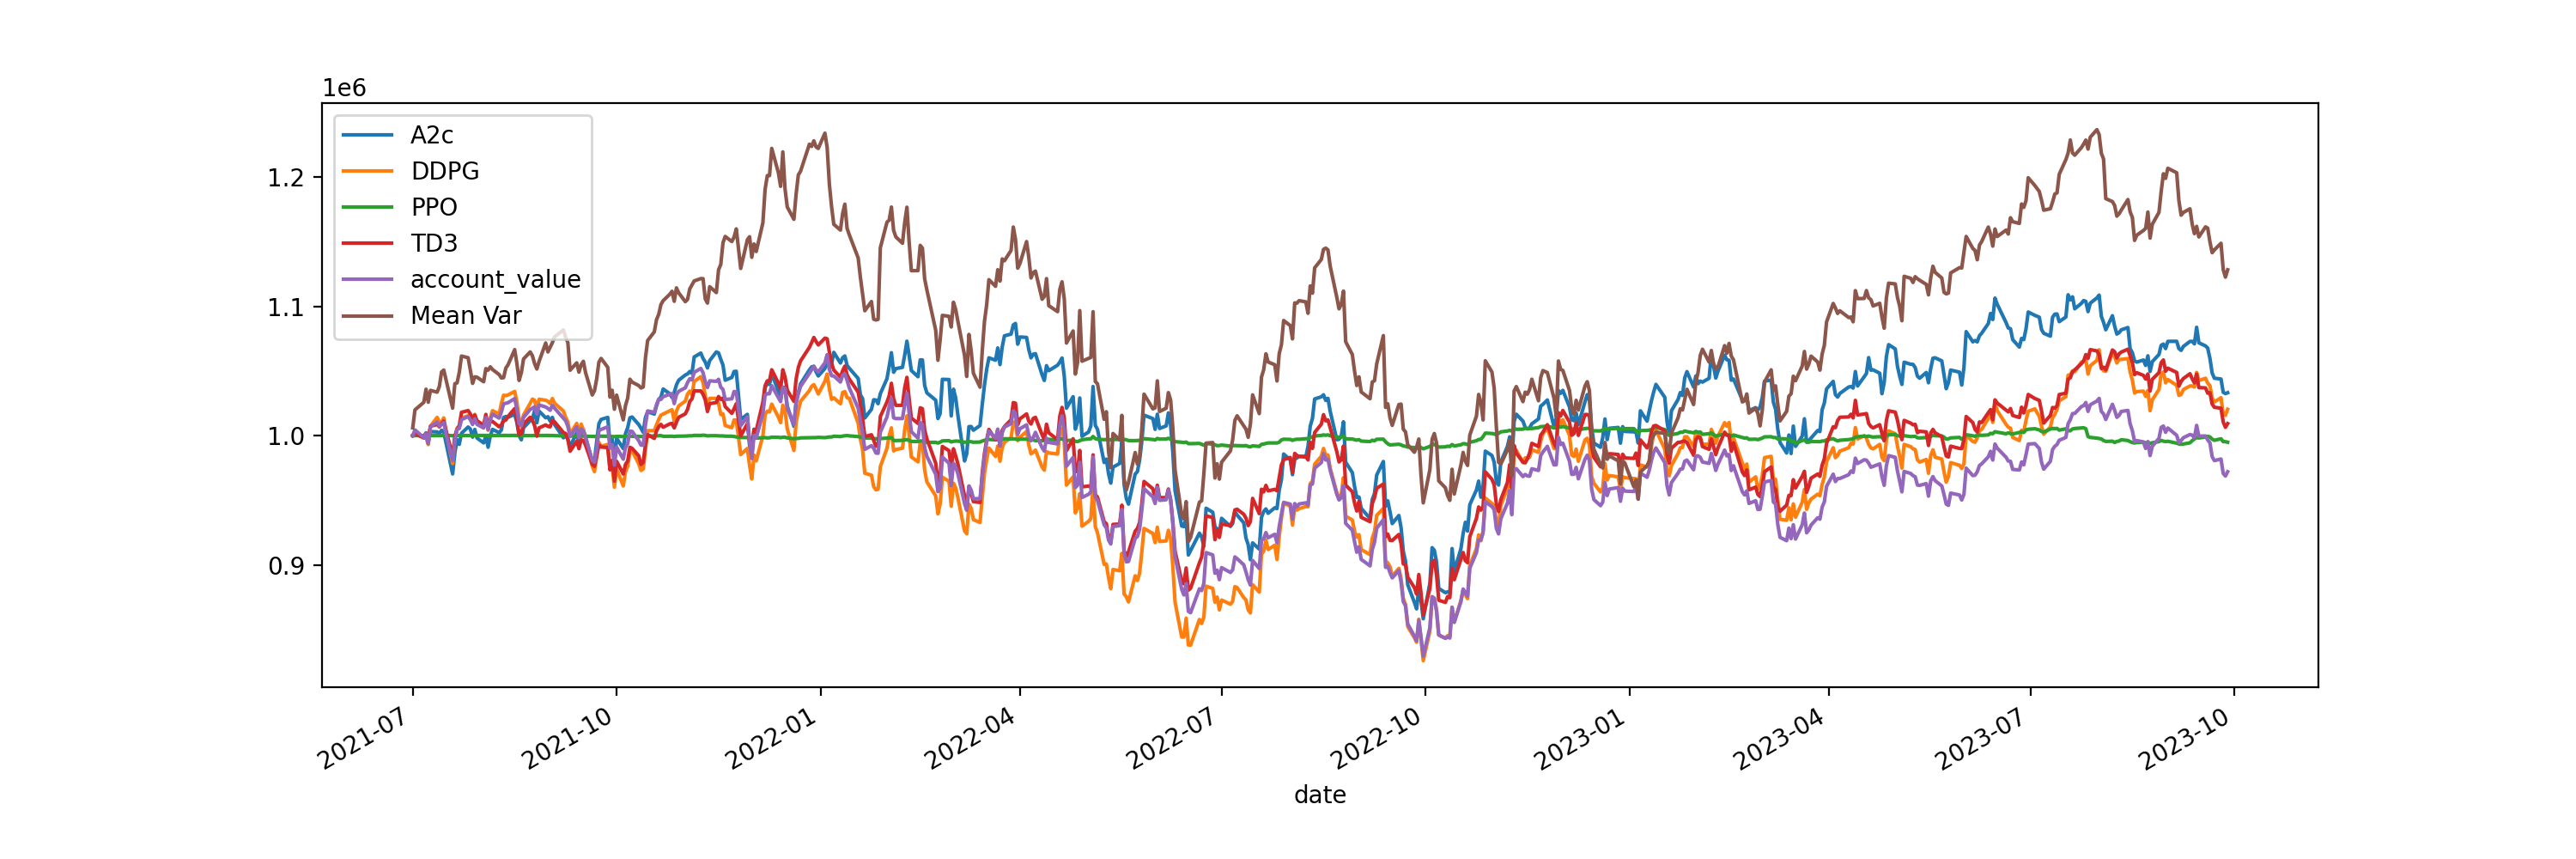

In [103]:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
df_agent_result.plot()

# Part 7: Backtesting Results
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [113]:
import pandas as pd


df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_a2c.rename(columns={'account_value': 'a2c'}, inplace=True)

df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_ddpg.rename(columns={'account_value': 'ddpg'}, inplace=True)

df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_td3.rename(columns={'account_value': 'td3'}, inplace=True)

df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_ppo.rename(columns={'account_value': 'ppo'}, inplace=True)

df_account_value_a2c.to_csv("df_account_value_a2c.csv")

# Baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
    ticker="^DJI",
    start=TRADE_START_DATE,
    end=TRADE_END_DATE)
stats = backtest_stats(df_dji_, value_col_name='close')

df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_a2c.index  # Using the index as the date column
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
df_dji.to_csv("df_dji_plus.csv")


result = df_result_a2c.copy()

result = result.merge(df_result_ddpg, how='left', left_index=True, right_index=True)
result = result.merge(df_result_td3, how='left', left_index=True, right_index=True)
result = result.merge(df_result_ppo, how='left', left_index=True, right_index=True)
result = result.merge(MVO_result, how='left', left_index=True, right_index=True)
result = result.merge(df_dji, how='left', left_index=True, right_index=True)

result.columns = ['df_result_a2c', 'df_result_ddpg', 'df_result_td3', 'df_result_ppo', 'mean var', 'dji']
result.to_csv("result.csv")


[*********************100%%**********************]  1 of 1 completed

==============Get Baseline Stats for DJIA===========
Shape of DataFrame:  (566, 8)
Annual return         -0.014608
Cumulative returns    -0.032513
Annual volatility      0.159564
Sharpe ratio          -0.012669
Calmar ratio          -0.066581
Stability              0.072371
Max drawdown          -0.219408
Omega ratio            0.997862
Sortino ratio         -0.017737
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.978790
Daily value at risk   -0.020111
dtype: float64


<Figure size 1500x500 with 0 Axes>

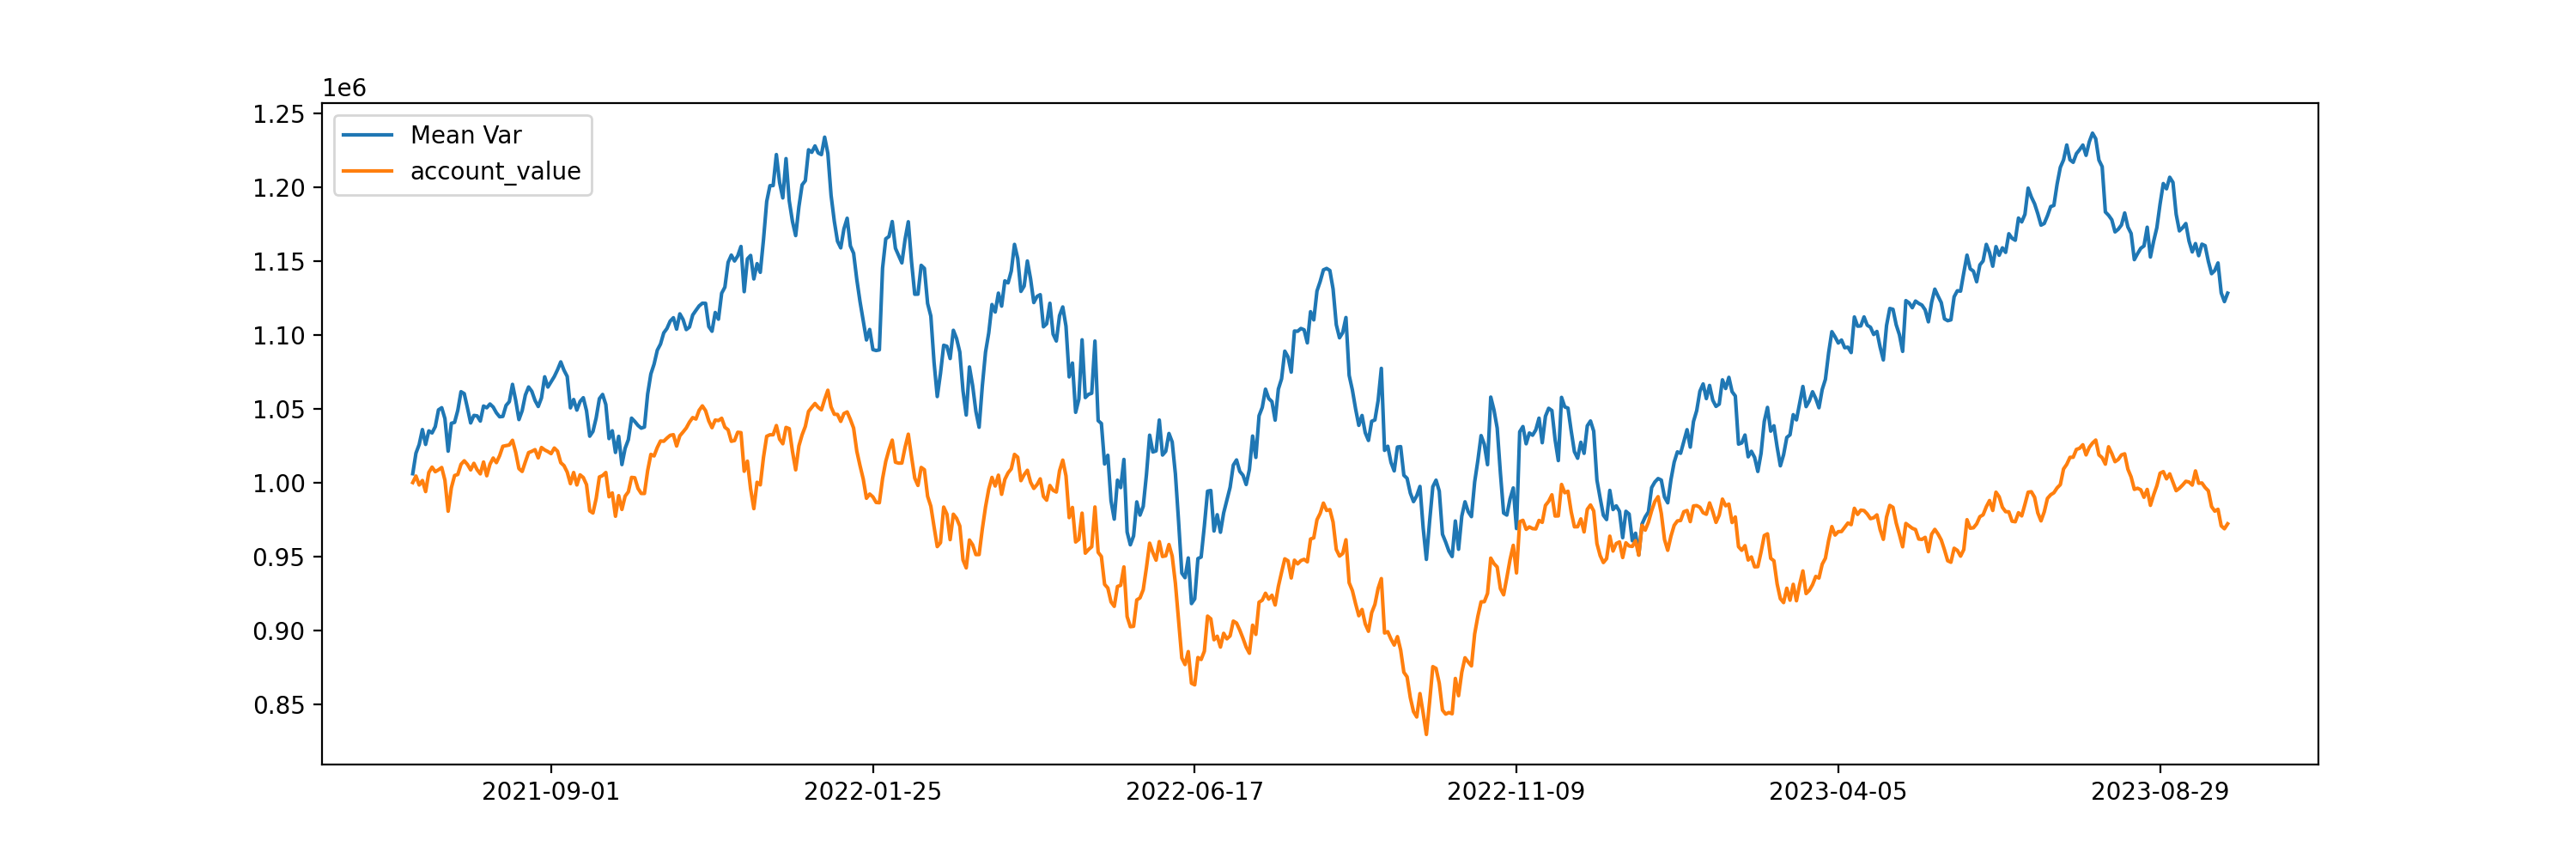

In [115]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();